# CIFAR-10 Classification

## Load Dataset

In [34]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [6]:
from load_dataset import load_cifar_10_data

In [18]:
X_train, _, y_train, X_test, _, y_test, cifar_label_name = load_cifar_10_data('dataset')

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
X_test.shape

(10000, 32, 32, 3)

## Visualize Data

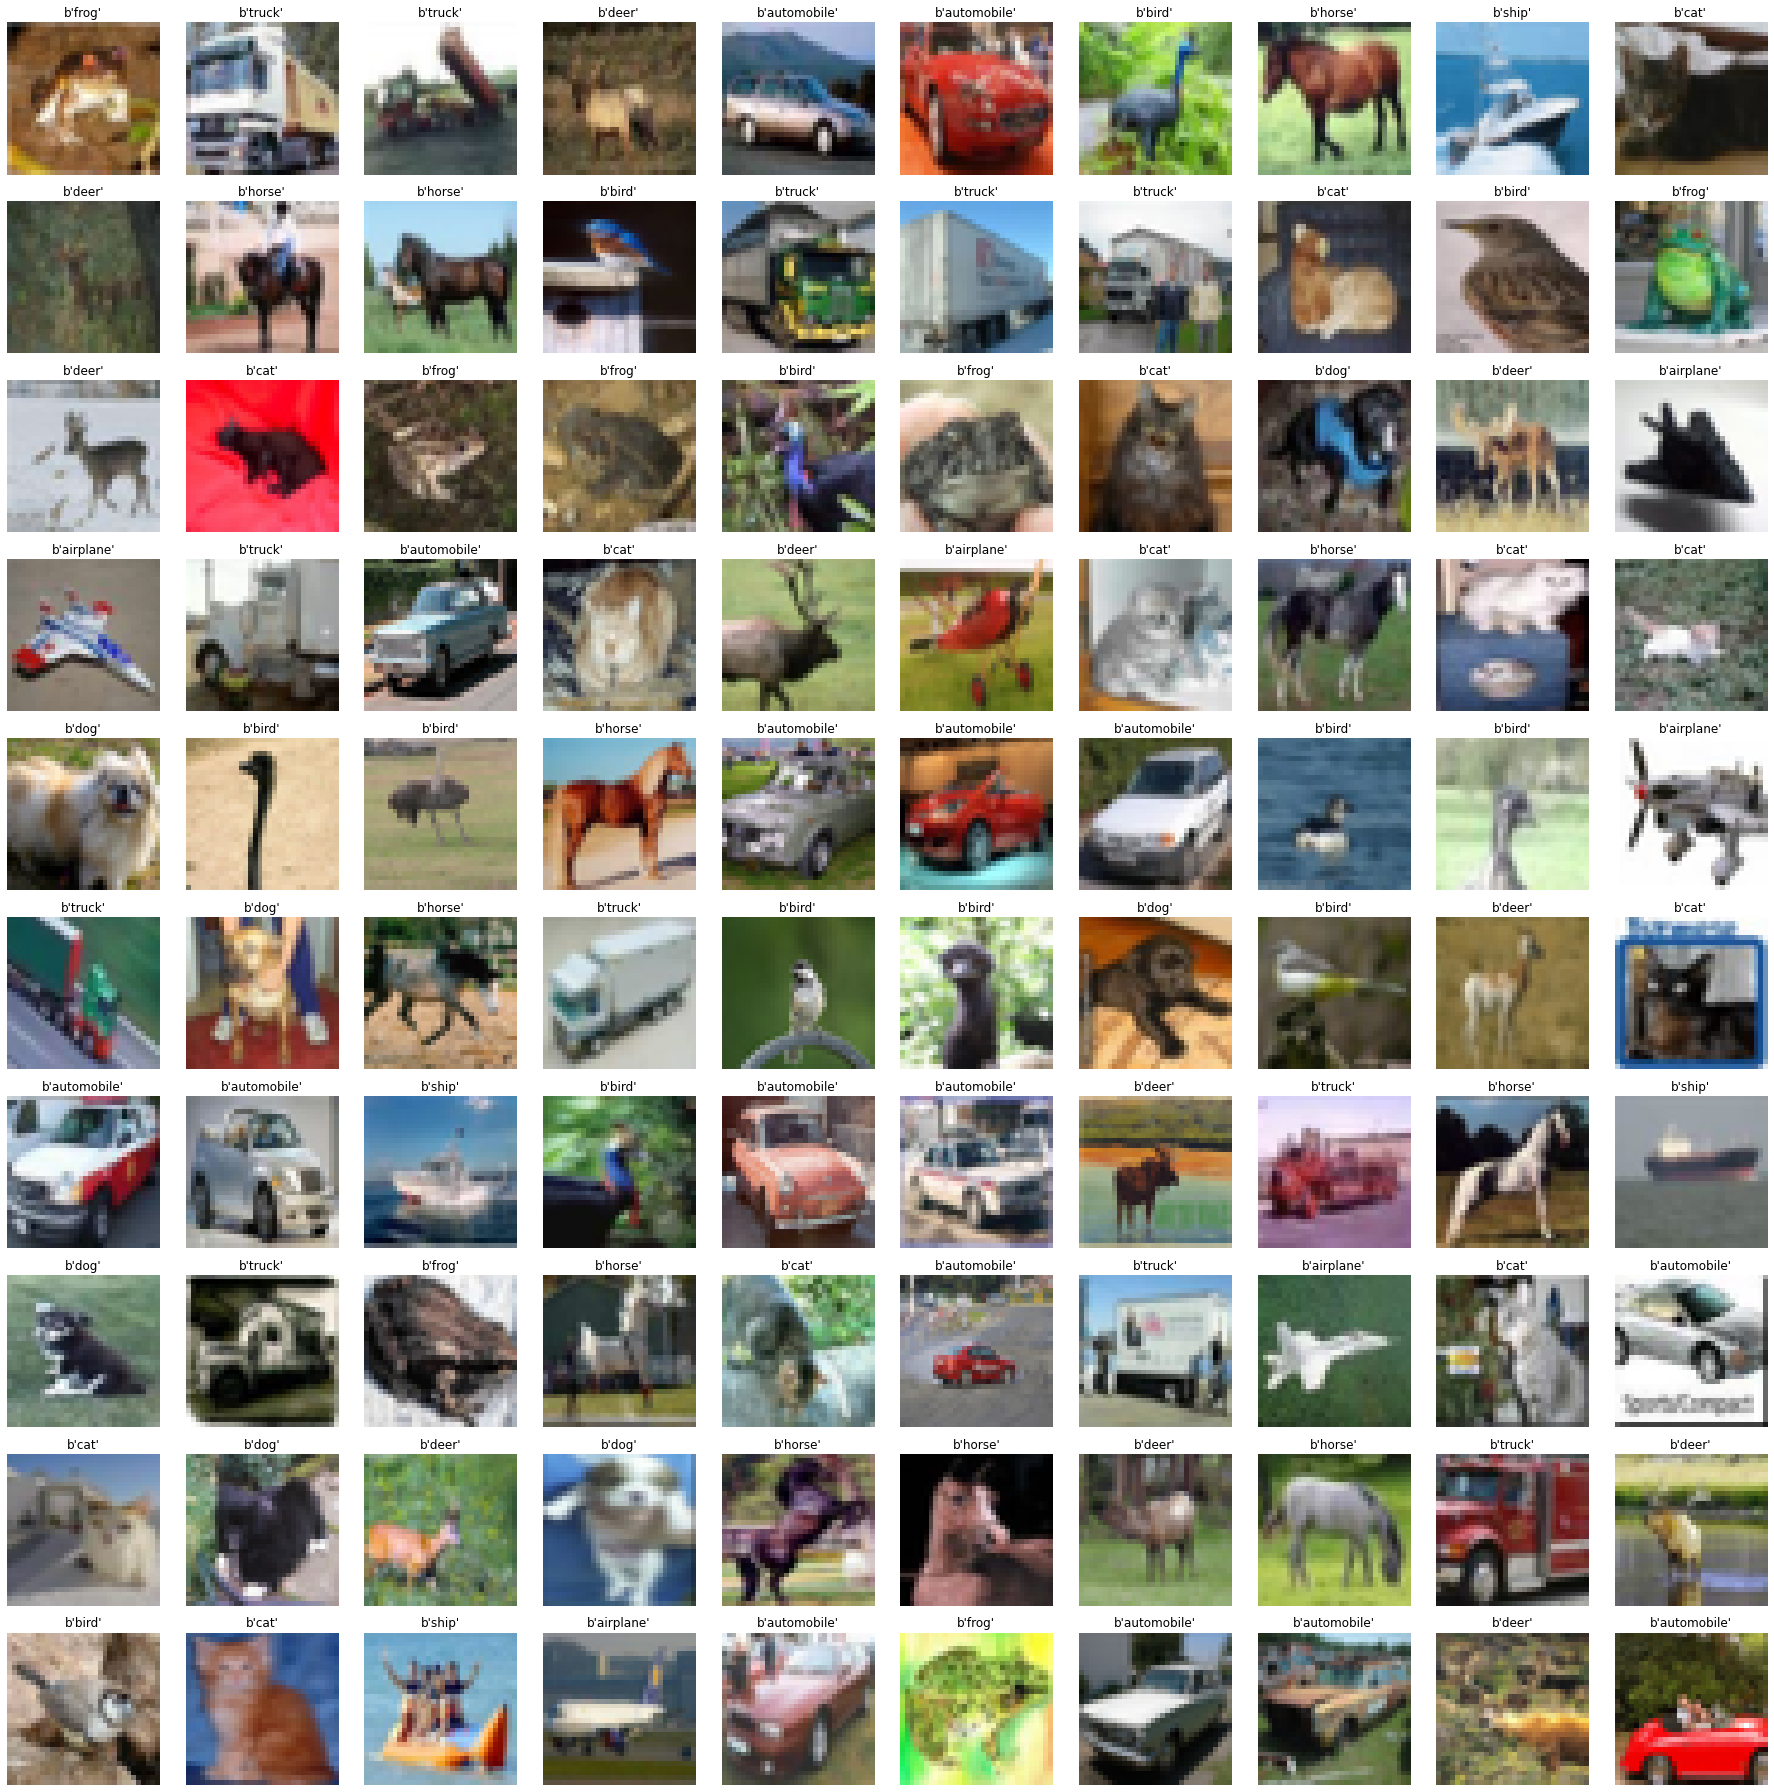

In [49]:
row_index = 10
col_index = 10

fig, axes = plt.subplots(row_index, col_index, figsize=(25,25))
axes = axes.ravel()

index = 0

for row in range(0, row_index * col_index):
        axes[row].imshow(X_train[index])
        axes[row].set_title(cifar_label_name[y_train[index]])
        axes[row].axis('off')
        index += 1

plt.tight_layout()

## Data Preperation

In [52]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [55]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, len(cifar_label_name))
y_test = to_categorical(y_test, len(cifar_label_name))

In [56]:
X_train = X_train/255
X_test = X_test/255

## Data Augmentation

In [68]:
from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [69]:
image_gen.fit(X_train)

## Model Training

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dropout, Flatten, BatchNormalization, Dense

In [71]:
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 input_shape=(X_train.shape[1:])))

model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 activation='relu'))

model.add(MaxPool2D(2,2))

model.add(Dropout(0.3))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 activation='relu'))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 activation='relu'))

model.add(MaxPool2D(2,2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1028, activation='relu'))

model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [104]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)         

In [72]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from datetime import datetime

log_dir = 'logs/fit/' + datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard = TensorBoard(log_dir=log_dir, 
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=2,
                         embeddings_freq=1)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [75]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [100]:
model.fit_generator(image_gen.flow(X_train, y_train, batch_size=32), epochs=100)

Epoch 1/100
  13/1563 [..............................] - ETA: 14s - loss: 0.7049 - accuracy: 0.7476

C:\Users\Eashan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1563/1563 [==============================] - 15s 9ms/step - loss: 0.6283 - accuracy: 0.7894
Epoch 2/100
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6260 - accuracy: 0.7906
Epoch 3/100
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6381 - accuracy: 0.7849
Epoch 4/100
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6682 - accuracy: 0.7764
Epoch 5/100
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6216 - accuracy: 0.7947
Epoch 6/100
1563/1563 [==============================] - 15s 9ms/step - loss: 0.6348 - accuracy: 0.7884
Epoch 7/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6251 - accuracy: 0.7901
Epoch 8/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6315 - accuracy: 0.7908
Epoch 9/100
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6244 - accuracy: 0.7929
Epoch 10/100
1563/1563 [==============================] - 15s 9ms/step - 

In [101]:
model.save('model/' + datetime.now().strftime("%Y%m%d-%H%M%S") + '.h5')

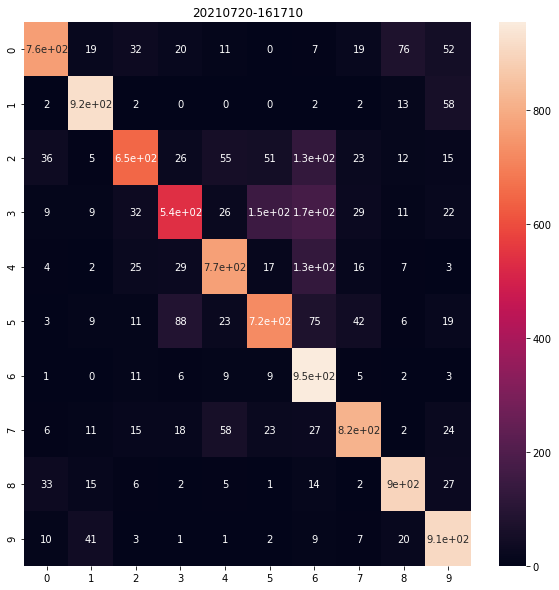

Accuracy is: 0.7936


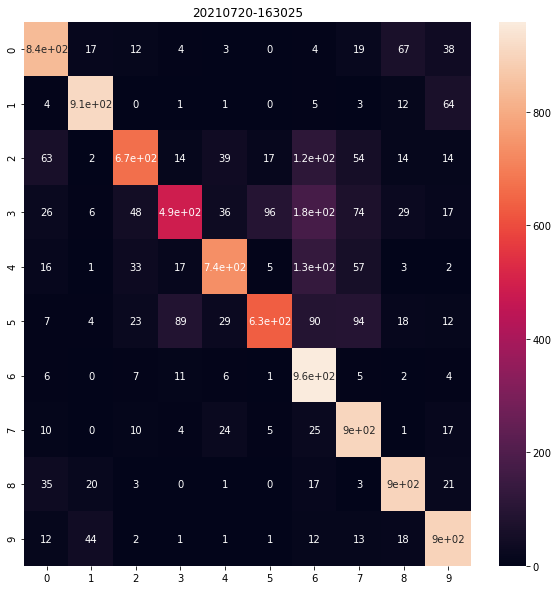

Accuracy is: 0.7931


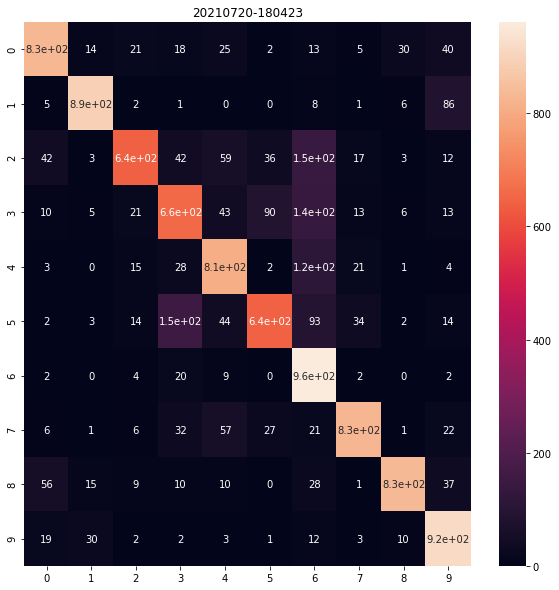

Accuracy is: 0.8013


In [99]:
import os
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score

models = os.listdir('model/')
# y_test = np.argmax(y_test, axis=1)

for m in models:

    my_model = load_model('model/' + m)
    
    fig = plt.figure(figsize=(10,10))

    y_pred =np.argmax(my_model.predict(X_test), axis=-1)
    
    cf = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    sns.heatmap(cf, annot=True)
    plt.title(m.split('.')[0])
    plt.show()
    print(f'Accuracy is: {acc}')